# KLM - Gender Paygap analysis
Last update: _2025.03.28_

- __Explain Steps and Results__: Clearly explain the steps taken and the interpretation of the results. The chain of thought should be evident.
- __Use Visualizations__: Incorporate visualizations to provide deeper insights into the data.
- __Investigate Missing Values and Outliers__: Examine and address any missing values and outliers in the data.
- __Feature Selection__: Carefully select features based on their relevance and importance.
- __Correlation Analysis__: Conduct correlation analysis and check for interaction terms.
- __Explain Oaxaca-Blinder__: Provide a detailed explanation of the Oaxaca-Blinder method, including its coefficients, limitations, and how the results could be improved.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pdf_data = pd.read_csv('GenderPayGapCase.csv', sep=';')

## Descriptives
Getting to know the data

In [3]:
pdf_data['sex'].value_counts()

sex
Man      2672
Vrouw    2246
Name: count, dtype: int64

In [4]:
pdf_data['nationality'].value_counts()

nationality
NL        4728
Not NL     190
Name: count, dtype: int64

In [5]:
pdf_data['contract_pct'].value_counts()

contract_pct
100      2731
80        631
66,7      516
50        452
90        344
70         78
60         73
66,67      44
75         15
67,5        6
52,5        5
45          5
40          3
20          3
95          3
82,5        3
85          2
23,53       2
65          1
55          1
Name: count, dtype: int64

<Axes: >

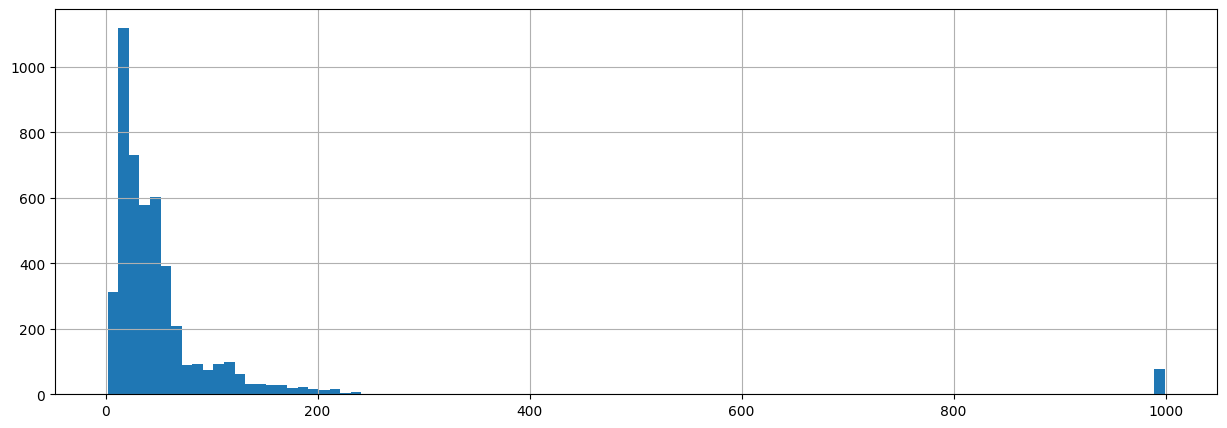

In [6]:
fig = plt.figure(figsize = (15, 5))
ax = fig.gca()
pdf_data['km_transport'].hist(bins=100, ax = ax)

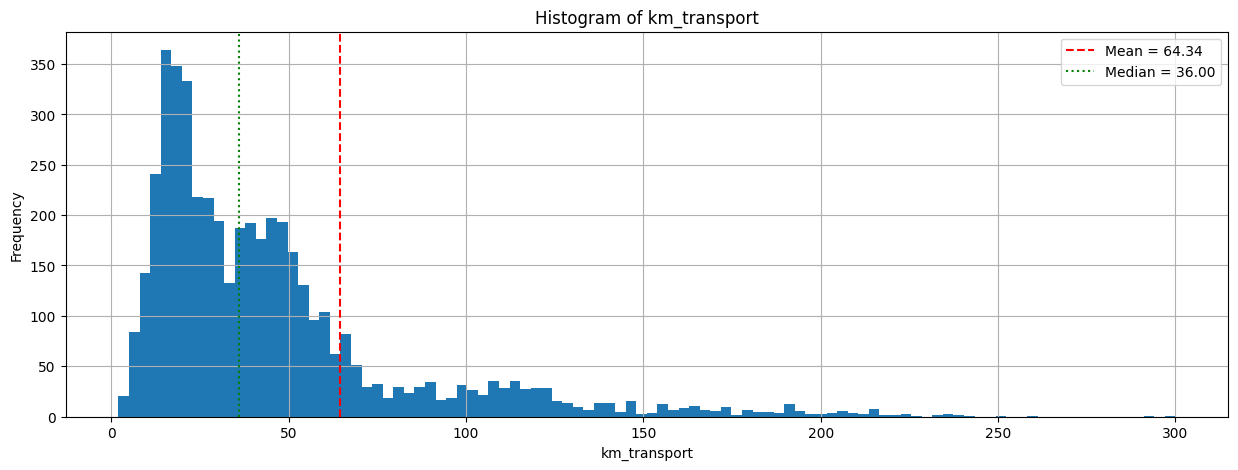

In [7]:
fig = plt.figure(figsize = (15, 5))
ax = fig.gca()
pdf_data[pdf_data['km_transport'] < 400]['km_transport'].hist(bins=100, ax = ax)
plt.axvline(x=pdf_data['km_transport'].mean(), color='r', linestyle='--', label='Mean = {:.2f}'.format(pdf_data['km_transport'].mean()))
plt.axvline(x=pdf_data['km_transport'].median(), color='g', linestyle=':', label='Median = {:.2f}'.format(pdf_data['km_transport'].median()))

plt.title('Histogram of km_transport')
plt.xlabel('km_transport')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The majority of the employees live in the vicinity of the office. 

In [9]:
pdf_data[pdf_data['km_transport'] > 400]['km_transport'].value_counts(dropna=False)

km_transport
999.0    77
517.0     1
997.0     1
900.0     1
638.0     1
593.0     1
790.0     1
693.0     1
853.0     1
559.0     1
723.0     1
864.0     1
478.0     1
819.0     1
981.0     1
988.0     1
926.0     1
652.0     1
516.0     1
808.0     1
679.0     1
Name: count, dtype: int64

There is a peak at 999, I suppose that if somebody lives farther than that, this is the max value, the system can accept.

In [10]:
pdf_data['maritalstatus'].value_counts()

maritalstatus
Relationship    3130
Single          1457
Separated        331
Name: count, dtype: int64

In [17]:
print('The `years of service` feature is ranging between {:}-{:} (spread: {:})'.format(
    pdf_data['years_of_services'].min(),
    pdf_data['years_of_services'].max(),
    pdf_data['years_of_services'].max()-pdf_data['years_of_services'].min()
))

The `years of service` feature is ranging between 0-48 (spread: 48)


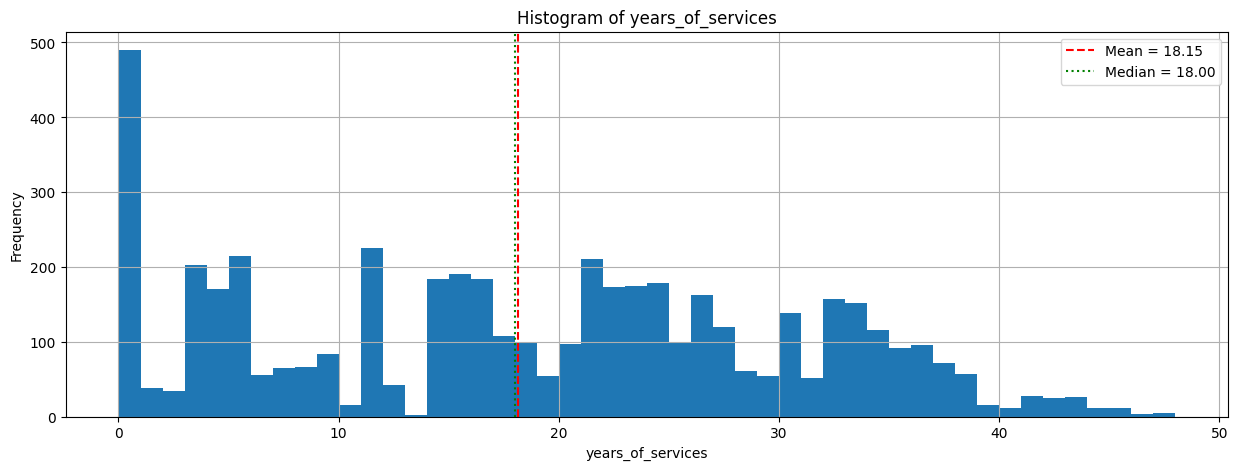

In [12]:
fig = plt.figure(figsize = (15, 5))
ax = fig.gca()
pdf_data['years_of_services'].hist(bins=48, ax = ax)
plt.axvline(x=pdf_data['years_of_services'].mean(), color='r', linestyle='--', label='Mean = {:.2f}'.format(pdf_data['years_of_services'].mean()))
plt.axvline(x=pdf_data['years_of_services'].median(), color='g', linestyle=':', label='Median = {:.2f}'.format(pdf_data['years_of_services'].median()))

plt.title('Histogram of years_of_services')
plt.xlabel('years_of_services')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
print('The `age` feature is ranging between {:}-{:} (spread: {:})'.format(
    pdf_data['age'].min(),
    pdf_data['age'].max(),
    pdf_data['age'].max()-pdf_data['age'].min()
))

The `age` feature is ranging between 18-66 (spread: 48)


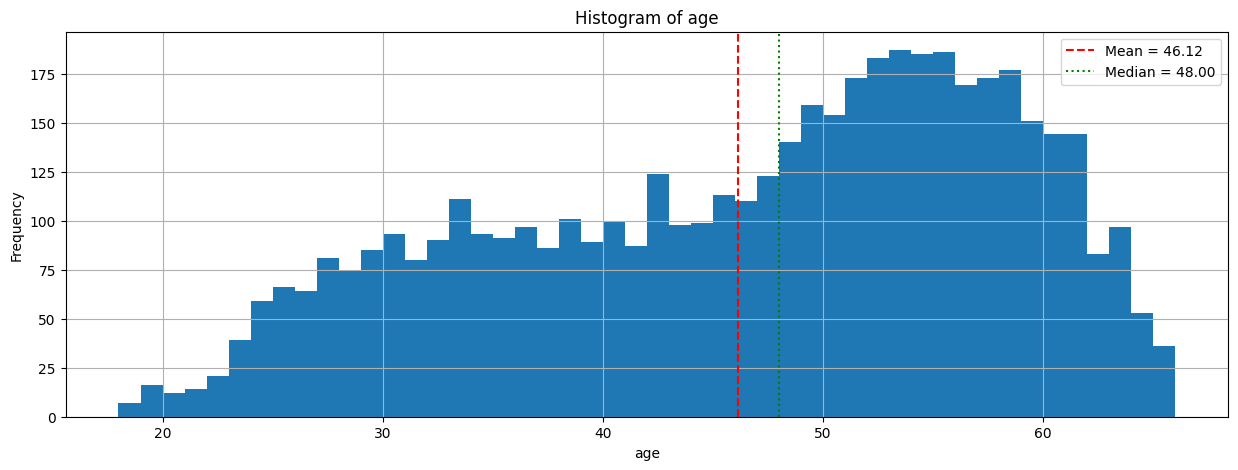

In [19]:
fig = plt.figure(figsize = (15, 5))
ax = fig.gca()
pdf_data['age'].hist(bins=48, ax = ax)
plt.axvline(x=pdf_data['age'].mean(), color='r', linestyle='--', label='Mean = {:.2f}'.format(pdf_data['age'].mean()))
plt.axvline(x=pdf_data['age'].median(), color='g', linestyle=':', label='Median = {:.2f}'.format(pdf_data['age'].median()))

plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Fixing the base salary and contract pct features
pdf_data['base_salary'] = pdf_data['base_salary'].str.replace(',', '.')
pdf_data['base_salary'] = pd.to_numeric(pdf_data['base_salary'])

pdf_data['contract_pct'] = pdf_data['contract_pct'].str.replace(',', '.')
pdf_data['contract_pct'] = pd.to_numeric(pdf_data['contract_pct'])

In [21]:
pdf_data['base_salary'].dtype, pdf_data['contract_pct'].dtype

(dtype('float64'), dtype('float64'))

In [22]:
print('The `base_salary` feature is ranging between {:}-{:} (spread: {:})'.format(
    pdf_data['base_salary'].min(),
    pdf_data['base_salary'].max(),
    pdf_data['base_salary'].max()-pdf_data['base_salary'].min()
))

The `base_salary` feature is ranging between 3.859742371-8.340998677 (spread: 4.481256306000001)


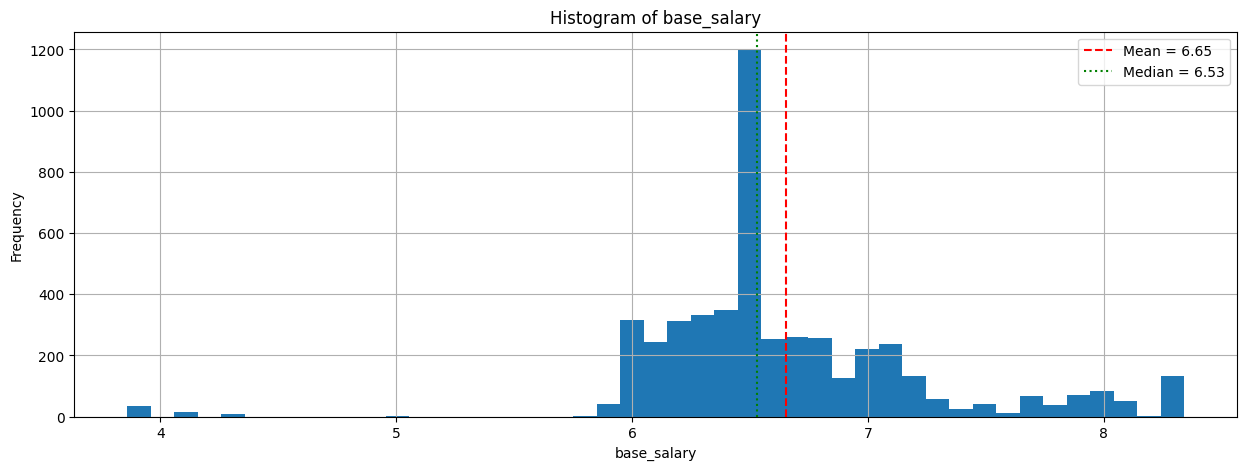

In [24]:
fig = plt.figure(figsize = (15, 5))
ax = fig.gca()
pdf_data['base_salary'].hist(bins=45, ax = ax)
plt.axvline(x=pdf_data['base_salary'].mean(), color='r', linestyle='--', label='Mean = {:.2f}'.format(pdf_data['base_salary'].mean()))
plt.axvline(x=pdf_data['base_salary'].median(), color='g', linestyle=':', label='Median = {:.2f}'.format(pdf_data['base_salary'].median()))

plt.title('Histogram of base_salary')
plt.xlabel('base_salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [25]:
pdf_data['nr_managers_above'].value_counts()

nr_managers_above
5    3171
4    1336
3     267
2      74
6      58
1       6
7       6
Name: count, dtype: int64

In [26]:
pdf_data['manager'].value_counts()

manager
0    4704
1     214
Name: count, dtype: int64

In [27]:
pdf_data['CLA_domain'].value_counts()

CLA_domain
Ground       2387
KLM Cabin    1750
Cockpit       623
KLC Cabin     158
Name: count, dtype: int64

In [28]:
pdf_data['direct'].value_counts()

direct
0    3414
1    1504
Name: count, dtype: int64

In [29]:
pdf_data['clob'].value_counts()

clob
clob_1     1768
clob_2      726
clob_3      675
clob_4      526
clob_5      382
clob_6      265
clob_7      170
clob_8      121
clob_9      118
clob_11      84
clob_10      83
Name: count, dtype: int64

In [30]:
def custom_split(x):
    x_arr = x.split(' ')
    return x_arr[0], ' '.join(x_arr[1:])

pdf_data[['plane_type', 'rank']] = pdf_data[['function']].apply(lambda x: custom_split(x['function']), axis=1, result_type='expand')

In [31]:
pdf_data[:5]

,sex,function,km_transport,nationality,contract_pct,base_salary,clob,nr_managers_above,manager,direct,CLA_domain,grading,maritalstatus,years_of_services,age,plane_type,rank
0,Man,A330 Tweede Officier,NaN,NL,100.0,6.981760,clob_4,4,0,0,Cockpit,grade_3,Relationship,3,33,A330,Tweede Officier
1,Man,A330 Tweede Officier,44.0,NL,100.0,6.747506,clob_4,4,0,0,Cockpit,grade_3,Single,0,26,A330,Tweede Officier
2,Man,A330 Tweede Officier,43.0,NL,100.0,7.072163,clob_4,4,0,0,Cockpit,grade_3,Single,4,27,A330,Tweede Officier
3,Man,B737 Eerste officier,61.0,NL,100.0,7.256418,clob_4,4,0,0,Cockpit,grade_3,Relationship,5,29,B737,Eerste officier
4,Man,B737 Eerste officier,71.0,NL,100.0,7.206537,clob_4,4,0,0,Cockpit,grade_3,Single,4,34,B737,Eerste officier


In [32]:
pdf_data[-5:]

,sex,function,km_transport,nationality,contract_pct,base_salary,clob,nr_managers_above,manager,direct,CLA_domain,grading,maritalstatus,years_of_services,age,plane_type,rank
4913,Vrouw,function_x,60.0,NL,80.0,6.428390,clob_10,2,0,1,Ground,grade_2,Relationship,30,52,function_x,
4914,Vrouw,function_x,34.0,NL,70.0,6.611192,clob_10,3,0,1,Ground,grade_2,Relationship,29,56,function_x,
4915,Vrouw,function_x,35.0,NL,60.0,6.611192,clob_10,3,0,1,Ground,grade_2,Relationship,27,57,function_x,
4916,Vrouw,function_x,23.0,NL,100.0,6.442214,clob_10,4,0,1,Ground,grade_2,Separated,32,56,function_x,
4917,Vrouw,function_x,38.0,NL,80.0,6.451806,clob_10,4,0,1,Ground,grade_2,Relationship,31,55,function_x,


In [33]:
pdf_data['plane_type'].value_counts()

plane_type
function_x    2387
Cabin         1472
B777           292
Purser         228
Senior         198
E190           152
B737           126
A330            52
Assistant        8
Employee         2
A32N             1
Name: count, dtype: int64

In [34]:
pdf_data['rank'].value_counts()

rank
                              2615
Attendant 1                    800
Attendant 2                    561
Gezagvoerder                   280
Purser                         160
Eerste Officier                138
Tweede Officier                 72
Co piloot                       70
Attendant                       66
Eerste officier                 63
Cabin Attendant                 46
Supervisor KLC                  45
Back Office HR SSC Level 1       2
Name: count, dtype: int64

In [35]:
pdf_data['grading'].value_counts()

grading
grade_1    1750
grade_2    1504
grade_3     623
grade_4     597
grade_5     210
grade_6     158
grade_7      62
grade_8      14
Name: count, dtype: int64

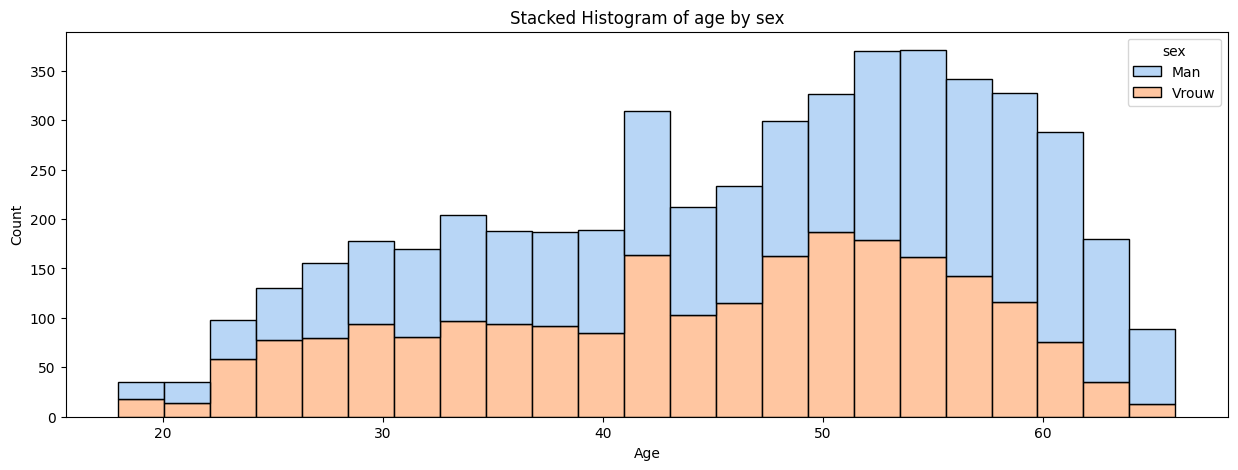

In [36]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(1, 1, 1)

sns.histplot(
    data=pdf_data,
    ax=ax,
    stat="count",
    multiple="stack",
    x="age",
    kde=False,
    palette="pastel",
    hue="sex",
    element="bars",
    legend=True
)
ax.set_title("Stacked Histogram of age by sex")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()

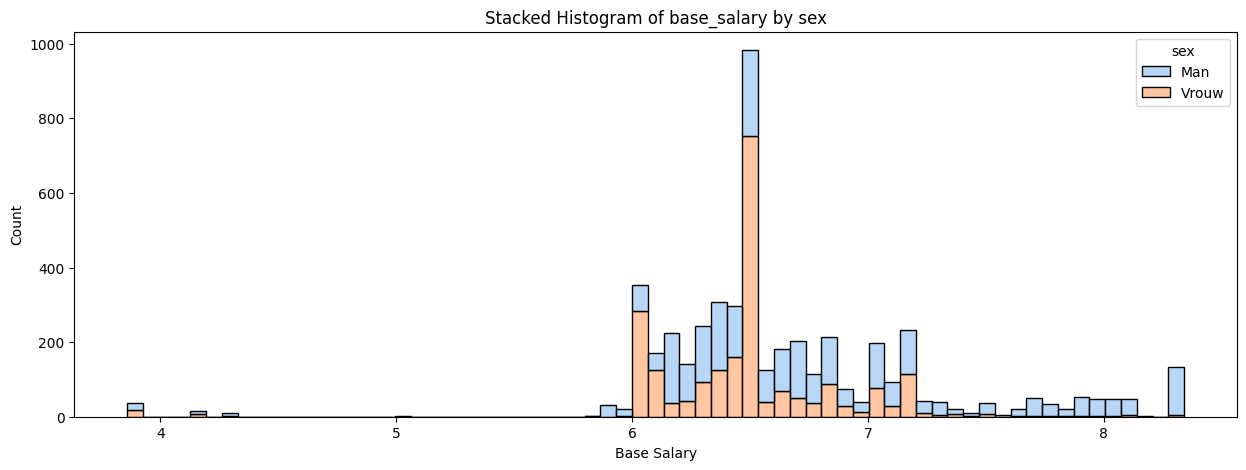

In [37]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(1, 1, 1)

sns.histplot(
    data=pdf_data,
    ax=ax,
    stat="count",
    multiple="stack",
    x="base_salary",
    kde=False,
    palette="pastel",
    hue="sex",
    element="bars",
    legend=True
)
ax.set_title("Stacked Histogram of base_salary by sex")
ax.set_xlabel("Base Salary")
ax.set_ylabel("Count")
plt.show()

Looks like there are more man in the upper region of the base salary

In [38]:
print('Man base salary:\n- mean: {:.2f}\n- median: {:.2f}\n- std: {:.2f}\n\nVrouw base salary:\n- mean: {:.2f}\n- median: {:.2f}\n- std: {:.2f}'.format(
    pdf_data[pdf_data['sex'] == 'Man']['base_salary'].mean(),
    pdf_data[pdf_data['sex'] == 'Man']['base_salary'].median(),
    pdf_data[pdf_data['sex'] == 'Man']['base_salary'].std(),
    pdf_data[pdf_data['sex'] == 'Vrouw']['base_salary'].mean(),
    pdf_data[pdf_data['sex'] == 'Vrouw']['base_salary'].median(),
    pdf_data[pdf_data['sex'] == 'Vrouw']['base_salary'].std(),
))

Man base salary:
- mean: 6.80
- median: 6.64
- std: 0.70

Vrouw base salary:
- mean: 6.48
- median: 6.53
- std: 0.46


## Missing values and outliers

In [163]:
pdf_data.isna().sum()

sex                    0
function               0
km_transport         153
nationality            0
contract_pct           0
base_salary            0
clob                   0
nr_managers_above      0
manager                0
direct                 0
CLA_domain             0
grading                0
maritalstatus          0
years_of_services      0
age                    0
plane_type             0
rank                   0
is_man                 0
is_nl                  0
dtype: int64

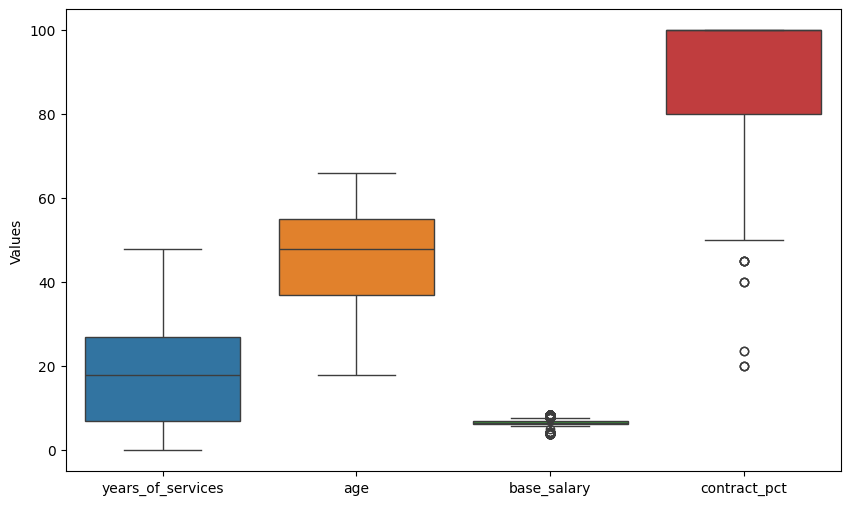

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pdf_data[['years_of_services', 'age', 'base_salary', 'contract_pct']])
plt.ylabel('Values')
plt.show()

Only the contract percentage feature shows outliers, not dropping them

In [ ]:
pdf_data[pdf_data['km_transport'].isna()][
    ['sex', 'nationality', 'clob', 'nr_managers_above', 'manager', 'direct', 'CLA_domain', 'grading', 'maritalstatus', 'years_of_services', 'age', 'plane_type', 'rank']
].value_counts()

sex    nationality  clob    nr_managers_above  manager  direct  CLA_domain  grading  maritalstatus  years_of_services  age  plane_type  rank       
Vrouw  NL           clob_1  5                  0        0       KLM Cabin   grade_1  Single         0                  24   Cabin       Attendant 1    4
                                                                                                                       23   Cabin       Attendant 1    4
                                                                                                                       22   Cabin       Attendant 1    3
Man    NL           clob_3  4                  0        0       Ground      grade_7  Single         0                  19   function_x                 3
Vrouw  NL           clob_1  5                  0        0       KLM Cabin   grade_1  Single         0                  27   Cabin       Attendant 1    3
                                                                                       

## T-test
Testing if the means of base salaries of women and women belong to the same distribution.

In [ ]:
from scipy.stats import ttest_ind

In [40]:
ttest_ind(
    pdf_data[pdf_data['sex'] == 'Man']['base_salary'],
    pdf_data[pdf_data['sex'] == 'Vrouw']['base_salary']
)

TtestResult(statistic=np.float64(18.45823334992199), pvalue=np.float64(1.3082119319397994e-73), df=np.float64(4916.0))

- t-value is large, suggesting that there is __substantial difference__ between the groups being compared and unlikely due to random chance.
- p-value is extremely small suggests that the result is significant

In [42]:
pdf_data['is_man'] = np.where(pdf_data['sex'] == 'Man', 1, 0)
pdf_data['is_nl'] = np.where(pdf_data['nationality'] == 'NL', 1, 0)

In [43]:
pdf_data[:5]

,sex,function,km_transport,nationality,contract_pct,base_salary,clob,nr_managers_above,manager,direct,CLA_domain,grading,maritalstatus,years_of_services,age,plane_type,rank,is_man,is_nl
0,Man,A330 Tweede Officier,NaN,NL,100.0,6.981760,clob_4,4,0,0,Cockpit,grade_3,Relationship,3,33,A330,Tweede Officier,1,1
1,Man,A330 Tweede Officier,44.0,NL,100.0,6.747506,clob_4,4,0,0,Cockpit,grade_3,Single,0,26,A330,Tweede Officier,1,1
2,Man,A330 Tweede Officier,43.0,NL,100.0,7.072163,clob_4,4,0,0,Cockpit,grade_3,Single,4,27,A330,Tweede Officier,1,1
3,Man,B737 Eerste officier,61.0,NL,100.0,7.256418,clob_4,4,0,0,Cockpit,grade_3,Relationship,5,29,B737,Eerste officier,1,1
4,Man,B737 Eerste officier,71.0,NL,100.0,7.206537,clob_4,4,0,0,Cockpit,grade_3,Single,4,34,B737,Eerste officier,1,1


## Correlation

In [190]:
# One-hot encoding some categorical variables
pdf_concatenated = pd.concat([
        pdf_data,
        pd.get_dummies(pdf_data['maritalstatus'], dummy_na=False, sparse=False),
        pd.get_dummies(pdf_data['clob'], dummy_na=False, sparse=False),
        pd.get_dummies(pdf_data['CLA_domain'], dummy_na=False, sparse=False),
        pd.get_dummies(pdf_data['rank'], dummy_na=False, sparse=False),
    ],
    axis=1
)

In [114]:
pdf_concatenated.shape, pdf_data.shape

((4918, 50), (4918, 19))

In [47]:
pdf_concatenated[[
 'km_transport', 'contract_pct', 'base_salary', 'nr_managers_above', 'manager', 'direct', 'years_of_services', 'age', #'plane_type', 'rank',
 'is_man', 'is_nl',
 'Relationship', 'Separated', 'Single',
 'clob_1', 'clob_10', 'clob_11', 'clob_2', 'clob_3', 'clob_4', 'clob_5', 'clob_6', 'clob_7', 'clob_8', 'clob_9',
 'Cockpit', 'Ground', 'KLC Cabin', 'KLM Cabin', '', 'Attendant', 'Attendant 1', 'Attendant 2',
 'Back Office HR SSC Level 1', 'Cabin Attendant', 'Co piloot', 'Eerste Officier', 'Eerste officier', 'Gezagvoerder', 'Purser', 'Supervisor KLC', 'Tweede Officier']][:5]

,km_transport,contract_pct,base_salary,nr_managers_above,manager,direct,years_of_services,age,is_man,is_nl,...,Attendant 2,Back Office HR SSC Level 1,Cabin Attendant,Co piloot,Eerste Officier,Eerste officier,Gezagvoerder,Purser,Supervisor KLC,Tweede Officier
0,NaN,100.0,6.981760,4,0,0,3,33,1,1,...,False,False,False,False,False,False,False,False,False,True
1,44.0,100.0,6.747506,4,0,0,0,26,1,1,...,False,False,False,False,False,False,False,False,False,True
2,43.0,100.0,7.072163,4,0,0,4,27,1,1,...,False,False,False,False,False,False,False,False,False,True
3,61.0,100.0,7.256418,4,0,0,5,29,1,1,...,False,False,False,False,False,True,False,False,False,False
4,71.0,100.0,7.206537,4,0,0,4,34,1,1,...,False,False,False,False,False,True,False,False,False,False


In [48]:
pdf_corr = pdf_concatenated[[
 'km_transport', 'contract_pct', 'base_salary', 'nr_managers_above', 'manager', 'direct', 'years_of_services', 'age', #'plane_type', 'rank',
 'is_man', 'is_nl',
 'Relationship', 'Separated', 'Single',
 'clob_1', 'clob_10', 'clob_11', 'clob_2', 'clob_3', 'clob_4', 'clob_5', 'clob_6', 'clob_7', 'clob_8', 'clob_9',
 'Cockpit', 'Ground', 'KLC Cabin', 'KLM Cabin', '', 'Attendant', 'Attendant 1', 'Attendant 2',
 'Back Office HR SSC Level 1', 'Cabin Attendant', 'Co piloot', 'Eerste Officier', 'Eerste officier', 'Gezagvoerder', 'Purser', 'Supervisor KLC', 'Tweede Officier'
]].corr()

In [49]:
pdf_corr.sort_values(by='base_salary', ascending=False, inplace=True)

A common rule of thumb for interpreting the strength of correlation coefficients:
- __Moderate__ correlation: 0.3 < r < 0.5
- __Strong__ correlation: 0.5 < r < 0.7
- __Very strong__ correlation: 0.7 < r

In [189]:
pdf_corr[
    (pdf_corr['base_salary'] != 1) &
    (
        (pdf_corr['base_salary'] > 0.3) |
        (pdf_corr['base_salary'] < -0.3)
    )
]['base_salary']

Cockpit              0.686083
clob_4               0.602006
Gezagvoerder         0.573010
Eerste Officier      0.352819
years_of_services    0.308916
Relationship         0.300656
Single              -0.326055
nr_managers_above   -0.402242
Name: base_salary, dtype: float64

Apparently there is a __strong correlation__ between the base salary and
- whether the employee works in the 'Cockpit' CLA domain
- member of 'clob_4' cluster line of business
- rank is 'Gezagvoerder'

__Moderate correlation__
- if the rank of the employee is 'Eerste Officier'
- the higher the years of employment is
- if the employee is in relationship

__Negative moderate__ correlation
- whether there a less manager above the employee
- if the employee is single

###  'Cockpit' CLA domain

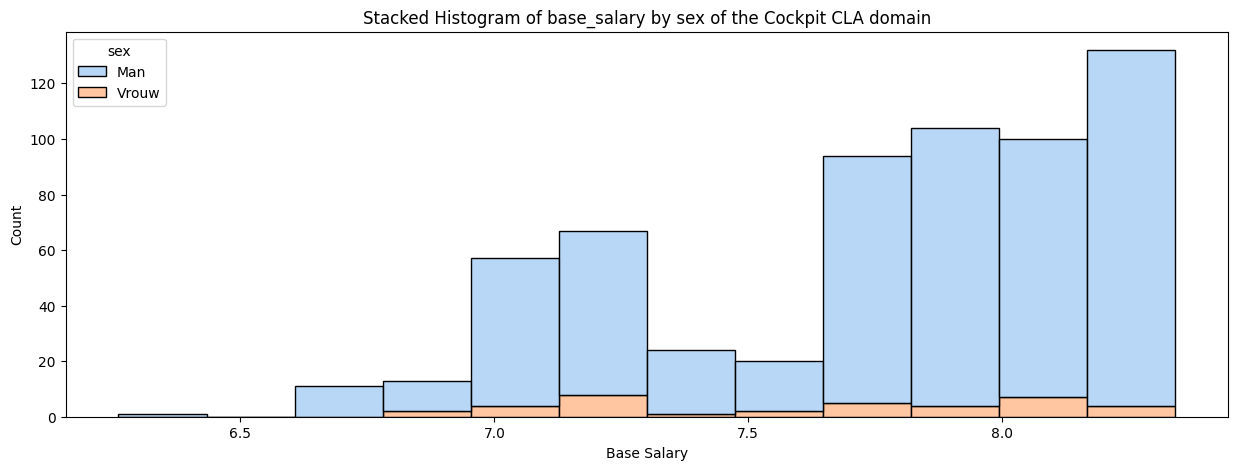

In [53]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(1, 1, 1)

sns.histplot(
    data=pdf_data[pdf_data['CLA_domain'] == 'Cockpit'],
    ax=ax,
    stat="count",
    multiple="stack",
    x="base_salary",
    kde=False,
    palette="pastel",
    hue="sex",
    element="bars",
    legend=True
)
ax.set_title("Stacked Histogram of base_salary by sex of the Cockpit CLA domain")
ax.set_xlabel("Base Salary")
ax.set_ylabel("Count")
plt.show()

In [54]:
pdf_data[pdf_data['CLA_domain'] == 'Cockpit']['sex'].value_counts()

sex
Man      586
Vrouw     37
Name: count, dtype: int64

In [55]:
ttest_ind(
    pdf_data[(pdf_data['CLA_domain'] == 'Cockpit') & (pdf_data['sex'] == 'Man')]['base_salary'],
    pdf_data[(pdf_data['CLA_domain'] == 'Cockpit') & (pdf_data['sex'] == 'Vrouw')]['base_salary']
)

TtestResult(statistic=np.float64(1.903154388496722), pvalue=np.float64(0.05748253981237945), df=np.float64(621.0))

The p-value is slightly above 0.05, meaning the result is __almost insignificant__. This suggests that while there is some evidence of a difference, it is not strong enough to be statistically significant at the 5% level. At __10% level__, the difference would be considered __significant__.

### 'clob_4' cluster line of business

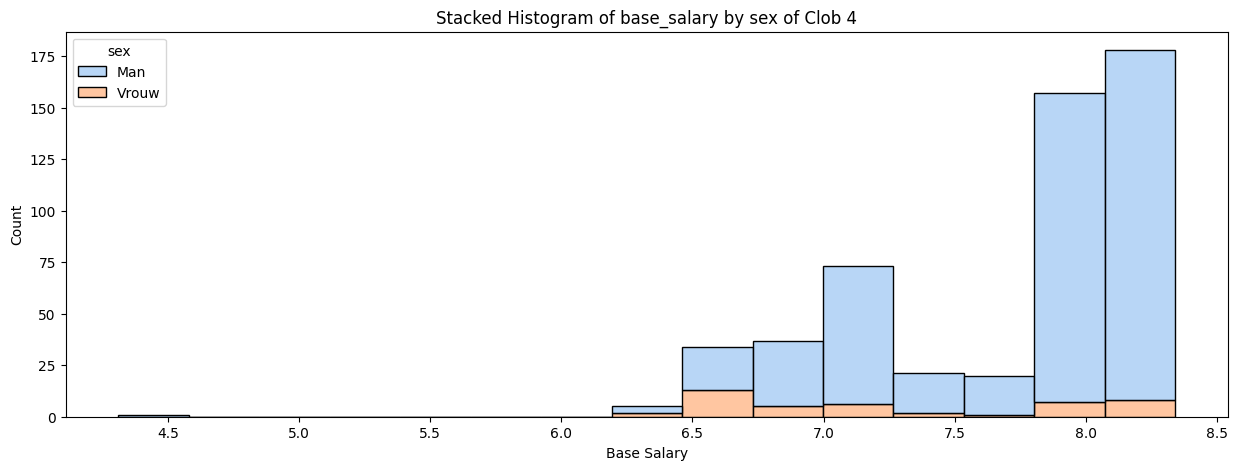

In [56]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(1, 1, 1)

sns.histplot(
    data=pdf_data[pdf_data['clob'] == 'clob_4'],
    ax=ax,
    stat="count",
    multiple="stack",
    x="base_salary",
    kde=False,
    palette="pastel",
    hue="sex",
    element="bars",
    legend=True
)
ax.set_title("Stacked Histogram of base_salary by sex of Clob 4")
ax.set_xlabel("Base Salary")
ax.set_ylabel("Count")
plt.show()

In [57]:
pdf_data[pdf_data['clob'] == 'clob_4']['sex'].value_counts()

sex
Man      482
Vrouw     44
Name: count, dtype: int64

In [58]:
ttest_ind(
    pdf_data[(pdf_data['clob'] == 'clob_4') & (pdf_data['sex'] == 'Man')]['base_salary'],
    pdf_data[(pdf_data['clob'] == 'clob_4') & (pdf_data['sex'] == 'Vrouw')]['base_salary']
)

TtestResult(statistic=np.float64(5.4910153580143035), pvalue=np.float64(6.238519350889173e-08), df=np.float64(524.0))

The p-value is small, thus the null hypothesis is rejected, we can confidently say that the two samples __do not have the same mean__.

### 'Gezagvoerder' as rank

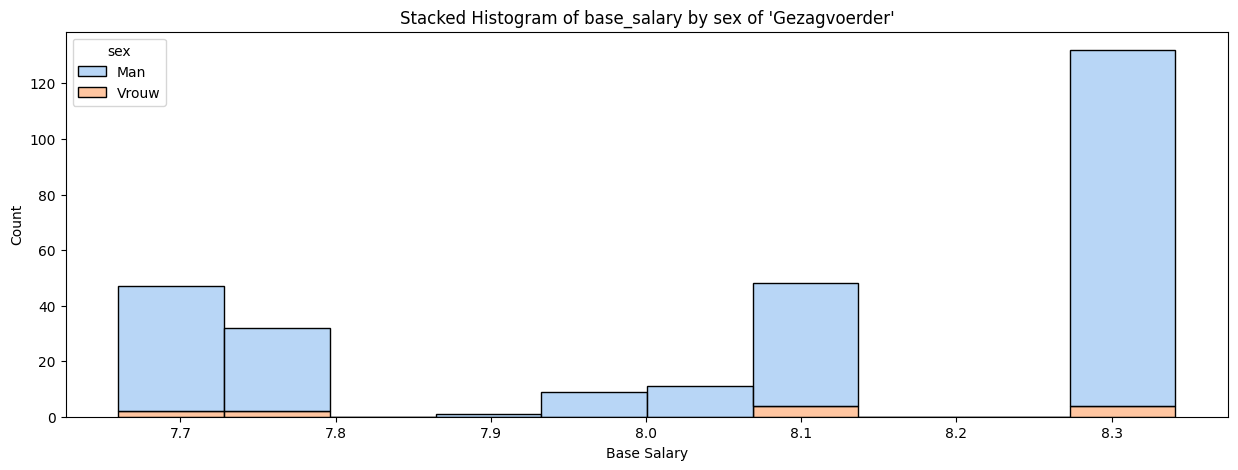

In [62]:
f = plt.figure(figsize=(15, 5))
ax = f.add_subplot(1, 1, 1)

sns.histplot(
    data=pdf_data[pdf_data['rank'] == 'Gezagvoerder'], # captain
    ax=ax,
    stat="count",
    multiple="stack",
    x="base_salary",
    kde=False,
    palette="pastel",
    hue="sex",
    element="bars",
    legend=True
)
ax.set_title("Stacked Histogram of base_salary by sex of 'Gezagvoerder'")
ax.set_xlabel("Base Salary")
ax.set_ylabel("Count")
plt.show()

In [60]:
pdf_data[pdf_data['rank'] == 'Gezagvoerder']['sex'].value_counts()

sex
Man      268
Vrouw     12
Name: count, dtype: int64

In [61]:
ttest_ind(
    pdf_data[(pdf_data['rank'] == 'Gezagvoerder') & (pdf_data['sex'] == 'Man')]['base_salary'],
    pdf_data[(pdf_data['rank'] == 'Gezagvoerder') & (pdf_data['sex'] == 'Vrouw')]['base_salary']
)

TtestResult(statistic=np.float64(0.5974820182723625), pvalue=np.float64(0.5506719605075522), df=np.float64(278.0))

Typically, a t-value greater than 2 suggests a meaningful difference. Here, 0.597 is very small, indicating little to no difference.
A high p-value means we fail to reject the null hypothesis, suggesting __no statistically significant difference__ between the two samples.

## Oaxaca-Blinder
The Oaxaca-Blinder decomposition is a statistical method used to analyze differences in an outcome variable (e.g., wages, test scores, employment rates) between two groups. It breaks down the gap into parts to help understand whether the difference is due to observable characteristics or other unexplained factors.

In [65]:
!pip install -q statsmodels

In [66]:
from statsmodels.stats.oaxaca import OaxacaBlinder

In [ ]:
# the algorithm is not able to handle NaN values, therefore we need to check if there are NaNs in the sample
pdf_temp = pdf_concatenated.isna().sum()
pdf_temp[pdf_temp > 0]

km_transport    153
dtype: int64

In [ ]:
# dropping both the NaN values and the km_transport values that are equal to 999
pdf_filtered = pdf_concatenated.drop(
    index=pdf_concatenated[
        (pdf_concatenated['km_transport'] == 999) |
        (pdf_concatenated['km_transport'].isna())
    ].index
)

In [135]:
pdf_filtered.shape

(4688, 50)

In [ ]:
# casting the boolean values to int
pdf_temp = pdf_filtered.dtypes.eq('bool')
for i in pdf_temp[pdf_temp].index:
    pdf_filtered[i] = pdf_filtered[i].astype(int)

In [160]:
ob = OaxacaBlinder(
    endog=pdf_filtered['base_salary'],
    exog=pdf_filtered[[
        'km_transport',
        'contract_pct', 'nr_managers_above', 'manager', 'direct', 'years_of_services', 'age',
        'is_man', 'is_nl',
        'Relationship', 'Separated', 'Single',
        'clob_1', 'clob_10', 'clob_11', 'clob_2', 'clob_3', 'clob_4', 'clob_5', 'clob_6', 'clob_7', 'clob_8', 'clob_9',
        'Cockpit', 'Ground', 'KLC Cabin', 'KLM Cabin', '', 'Attendant', 'Attendant 1', 'Attendant 2',
        'Back Office HR SSC Level 1', 'Cabin Attendant', 'Co piloot', 'Eerste Officier', 'Eerste officier', 'Gezagvoerder', 'Purser', 'Supervisor KLC', 'Tweede Officier'
    ]],
    bifurcate='is_man',
    hasconst = False
)

In [161]:
ob.two_fold().summary()

Oaxaca-Blinder Two-fold Effects
Unexplained Effect: 0.02514
Explained Effect: 0.28289
Gap: 0.30803


1. __Explained Effect (0.28289)__:
- This accounts for most of the gap, meaning the difference is largely due to measurable characteristics (e.g., education, experience, industry, etc.).
- If the two groups had the same characteristics, the gap would be much smaller, but 0.28289 of it would still persist due to these observable differences.
2. __Unexplained Effect (0.02514)__:
- This is a relatively small portion of the gap, meaning there is little evidence of differences due to unmeasured factors such as discrimination, bias, or omitted variables.
- Since this value is close to zero, it suggests that most of the difference is not due to unobserved factors but rather to differences in the measurable characteristics of the two groups.

__Interpretation__:
- Since the explained effect (0.28289) is much larger than the unexplained effect (0.02514), it suggests that the observed differences between the groups (e.g., education levels, experience, job types) are the primary drivers of the gap.
- The unexplained effect is small, meaning there is little evidence that factors like discrimination or different treatment significantly contribute to the difference.

In [162]:
ob.three_fold().summary()

Oaxaca-Blinder Three-fold Effects
Endowment Effect: 0.28037
Coefficient Effect: -0.01892
Interaction Effect: 0.04658
Gap: 0.30803


1. __Endowment Effect (0.28037)__:
- This represents the portion of the gap due to differences in observable characteristics between the two groups (e.g., education, experience, industry).
- A large positive endowment effect means that most of the gap is explained by measurable differences.
2. __Coefficient Effect (-0.01892)__:
- This reflects differences in how characteristics are rewarded or valued across groups (e.g., wage discrimination, unequal returns to education).
- A negative coefficient effect suggests that the disadvantaged group is actually receiving better returns on its characteristics than the advantaged group.
- This might indicate that if both groups had the same characteristics, the gap would be even larger in favor of the disadvantaged group.
3. __Interaction Effect (0.04658)__:
- This accounts for the simultaneous effect of differences in characteristics and how they are valued.
- A positive interaction effect means that the combined influence of endowments and coefficients contributes slightly to widening the gap.

__Interpretation__:
- The endowment effect (0.28037) is the dominant factor, meaning the difference is mostly due to measurable characteristics.
- The coefficient effect (-0.01892) is negative, suggesting that if the groups had identical characteristics, the disadvantaged group might actually perform better.
- The interaction effect (0.04658) contributes slightly to the gap.
- Since the endowment effect is much larger than the coefficient effect, the primary driver of the gap is differences in observable factors rather than differences in how those factors are rewarded.

__Conclusion:__
Both decompositions support the fact that the difference of the mean of men and women salaries due to measurable characteristics. Although there is a little evidence due to unmeasured factors, that can be accounted to discrimination, but propotionally negligible.